Random Forest Metrics:
Mean Squared Error (MSE): 0.592
Root Mean Squared Error (RMSE): 0.769
Mean Absolute Error (MAE): 0.480
R² Score: 0.951


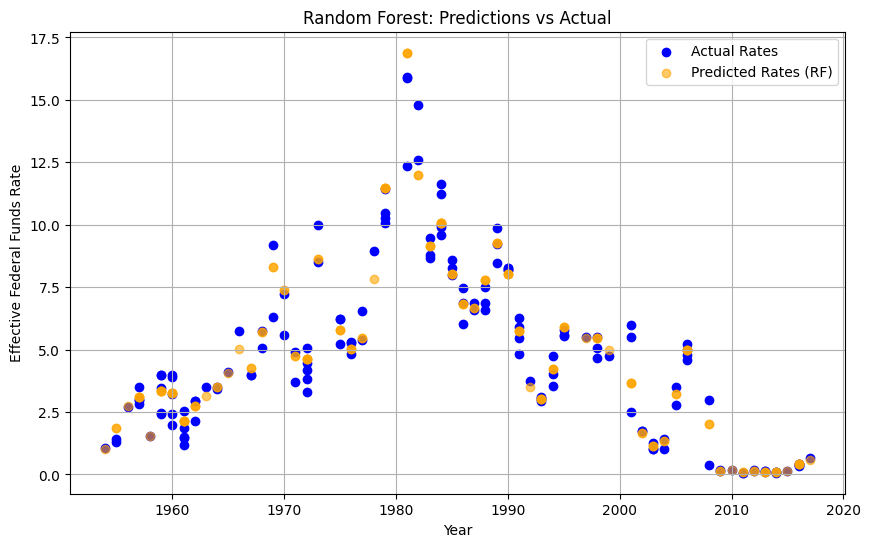

Predicted interest rate for 2023: 0.567%
Predicted interest rate for 2024: 0.567%
Predicted interest rate for 2025: 0.567%


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'index.csv'  # Replace with the actual file path
nn_interest_data = pd.read_csv(file_path)

# Selecting relevant columns: Year and Effective Federal Funds Rate
data = nn_interest_data[['Year', 'Effective Federal Funds Rate']].dropna()

# Features (Year) and target (Effective Federal Funds Rate)
X = data[['Year']].values
y = data['Effective Federal Funds Rate'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Displaying metrics for Random Forest
print("Random Forest Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.3f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.3f}")
print(f"R² Score: {r2_rf:.3f}")

# Visualizing Random Forest predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Rates')
plt.scatter(X_test, y_pred_rf, color='orange', label='Predicted Rates (RF)', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Effective Federal Funds Rate')
plt.title('Random Forest: Predictions vs Actual')
plt.legend()
plt.grid()
plt.show()

# Function to predict interest rate for a given year
def predict_interest_rate(year):
    return rf_model.predict(np.array([[year]]))[0]

# Example: Predicting interest rate for 2023, 2024, 2025
predicted_2023 = predict_interest_rate(2023)
predicted_2024 = predict_interest_rate(2024)
predicted_2025 = predict_interest_rate(2025)

print(f"Predicted interest rate for 2023: {predicted_2023:.3f}%")
print(f"Predicted interest rate for 2024: {predicted_2024:.3f}%")
print(f"Predicted interest rate for 2025: {predicted_2025:.3f}%")

# Savings acc


In [ ]:
import joblib

# Save the Random Forest model to a file
model_filename = 'random_forest_interest_rate.pkl'
joblib.dump(rf_model, model_filename)
print(f"Model saved as {model_filename}")


Model saved as random_forest_interest_rate.pkl
